# Приоритизация гипотез и анализ A/B-теста

Цель работы - выбрать изменение, которое приведет к росту выручки интернет-магазина. В первой части исследования проводится приоритизация гипотез и выбирается наиболее перспективная для тестирования. Затем для проверки гипотезы проводится А/B-тест.

Результаты A/B-теста перед анализом прошли необходимую обработку (работа с пропусками, дубликатами, типом данных). Проверка гипотезы проведена при помощи статистического теста как на изначальных, так и на отфильтрованных данных. В конце работы даны выводы и рекомендации.

In [1]:
# импорт необходимых библиотек
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.set_option('max_colwidth', 400)
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import scipy.stats as stats

In [2]:
def load_csv_choose_path(filename):
    """
    Функция читает csv файл, проверяя 2 пути,
    чтобы не требовалось править код перед отправкой ревьюверу.
    Созданна коллективно в da_24_teamwork
    """
    path1 = filename
    path2 = '/datasets/' + filename
    if os.path.exists(path1):
        data = pd.read_csv(path1)
    elif os.path.exists(path2):
        data = pd.read_csv(path2)
    else:
        raise FileNotFoundError(filename)
    return data

## Часть 1. Приоритизация гипотез.

Выведем на экран информацию о гипотезах:

In [3]:
hypothesis = load_csv_choose_path('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Каждый параметр гипотез оценен по 10-балльной шкале. Оценим каждую гипотезу при помощи фреймворка ICE:

In [4]:
hypothesis.columns= hypothesis.columns.str.lower()
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы - 8, 0 и 7. Посмотрим, даст ли фреймворк RICE такой же результат.

In [5]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Теперь самая перспективная гипотеза для проверки - 7, причем ее рейтинг в две раза больше следующей по убыванию гипотезы. В свою очередь гипотеза 8 спустилась с 1ого места на 5ое. Причина в том, что во фреймворке RICE мы принимаем во внимание парамет reach или охват, то есть сколько пользователей затронет изменение. Reach 7ой гипотезы максимальный, а у 8ой - минимальный. Несмотря на то, что остальные параметры 7ой гипотезы чуть ниже, чем у 8ой, она является боле перспективной из-за максимального охавата. По этой же причине изменился порядок приоритетов у остальных гипотез.

## Часть 2. Анализ A/B-теста
### 2.1. Знакомство с данными и предобработка

Мы провели А/B-тест выбранной гипотезы. Загрузим данные и выведем на экран первые 5 строк вместе с основной информацией о датафрейме.

In [6]:
orders = load_csv_choose_path('orders.csv')
visitors = load_csv_choose_path('visitors.csv')

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице orders представлены данные о заказах в интернет-магазине. Во всех столбцах одинаковое количество строк - значит, пропусков нет.

Столбцы с уникальным номером заказа и посетителя принадлежат к целочисленному типу данных int. В данном случае логичнее будет преобразовать эти столбцы к типу object (по аналогии со столбцом group). В свою очередь столбец с датой преобразуем к типу datetime для корректной работы с данными о дате заказа. Данные о выручке уже принадлежат к корректному типу int.

Выборочно преобразуем столбцы к нужному типу данных при помощи метода .astype().

In [9]:
orders = orders.astype({'transactionId' : 'object', 
                        'visitorId': 'object', 
                        'group': 'object', 
                        'date': 'datetime64'})

Проверка:

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null object
visitorId        1197 non-null object
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB


Убедимся, что данные выгрузились правильно и в них нет дубликатов. Единственный столбец, где значения не должны повторяться - это transactionId. Применим к столбцу метод .duplicated():

In [11]:
orders[orders['transactionId'].duplicated()]

,transactionId,visitorId,date,revenue,group


В результате получили пустой датафрейм - значит, дубликатов нет.

Изучим данные о посетителях в таблице visitors.

In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет, а типы данных соответствуют данным по смыслу - кроме столбца date. Преобразуем его к типу datetime:

In [14]:
visitors['date'] = visitors['date'].astype('datetime64[ns]')

Проверка:

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим на дубликаты. Т.к. в таблице нам дано количество посетителей двух групп на каждую дату эксперимента, то каждая дата должна встречаться по одному разу в каждой группе. Применим метод .duplicated() одновременно к столбцу date и group:

In [16]:
visitors[visitors[['date', 'group']].duplicated()]

,date,group,visitors


Получили пустой датафрейм - следовательно, дубликатов нет.

Наконец, убедимся, что в обеих таблицах собраны данные за одинаковый период:

In [17]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [18]:
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Исследуемый период - август 2019 года - в таблицах совпадает.

Чтобы результаты теста были точными, группы А и В не должны сильно отличаться по размеру. Сравним количество посетителей групп А и В:

In [19]:
visitors.groupby('group').sum()

,visitors
group,
A,18736
B,18916


Размер групп отличается незначительно, поэтому можно приступать к проверке гипотезы.

### 2.2. Исследование куммулятивных данных

#### 2.2.1 Анализ выручки и среднего чека

Для анализа динамики показателей удобнее смотреть на куммулятивные данные - это позволяет сгладить "скачки" на графике и оценить общую тенденцию. 

Посчитаем накопительные значения выручки, количества посетителей и заказов на каждую дату эксперимента. Полученные данные соберем в одну таблицу.

Для расчета накопительных значений сначала создами датафрейм dateGroups, в котором предтавлена каждая дата эксперимента и группа. К нему применем метод .apply() с функцией lambda x, которая на каждой итерации будет брать данные из таблицы orders  соответсвующей группы, по каждую дату включительно. Метод .agg() аггрегирует данные и вернет сумму выручки и количество уникальных значений заказов и посетителей. Результат сохраним в датафрейм ordersAggregated.

In [20]:
dateGroups = orders[['date', 'group']].drop_duplicates()

In [21]:
ordersAggregated = dateGroups.apply(
    lambda x: orders[
        np.logical_and(orders["date"] <= x["date"], orders["group"] == x["group"])
    ].agg(
        {
            "date": "max",
            "group": "max",
            "transactionId": pd.Series.nunique,
            "visitorId": pd.Series.nunique,
            "revenue": "sum",
        }
    ),
    axis=1,
).sort_values(by=["date", "group"])


Накопительное количество посетителей visitorsAggregated считаем по аналогии с ordersAggregated.

In [22]:
visitorsAggregated = dateGroups.apply(
    lambda x: visitors[
        np.logical_and(visitors["date"] <= x["date"], visitors["group"] == x["group"])
    ].agg({"date": "max", "group": "max", "visitors": "sum"}),
    axis=1,
).sort_values(by=["date", "group"])


Объединим полученные датафреймы методом .merge() и переименуем столбы.

In [23]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Посмотрим на результат:

In [24]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Теперь построим графики.

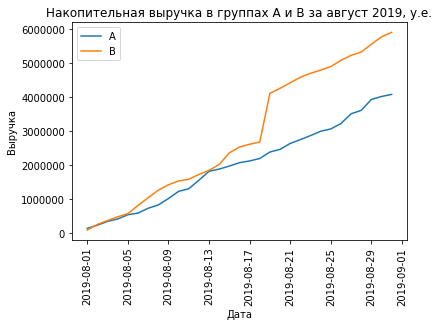

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation='vertical')
plt.legend();
plt.title('Накопительная выручка в группах А и В за август 2019, у.е.');
plt.xlabel('Дата');
plt.ylabel('Выручка');

Выручка группы А равномерно увеличивается в течение всего теста. Выручка группы В превышает выручку группы А с 05 августа и затем увеличивается более резкими темпами. Скачок выручки группы В наблюдается после 17 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы нужно проанализировать, т.к. это может исказить результаты теста.

Построим график кумулятивного среднего чека - то есть отношения выручки к количеству заказов.

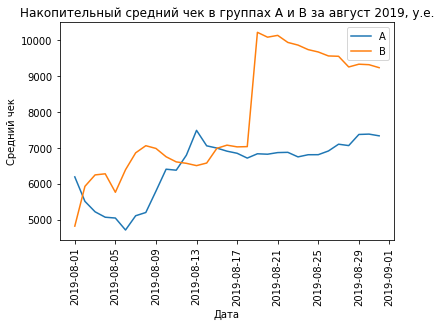

In [26]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation='vertical');
plt.legend();
plt.title('Накопительный средний чек в группах А и В за август 2019, у.е.');
plt.xlabel('Дата');
plt.ylabel('Средний чек');

На предыдущем графике мы видели, что выручка обеих групп росла равномерно в первой половине месяца. График среднего чека (напомним, это отношение выручки к количеству покупателей) сильно "скачет" в первой половине месяца, из чего можно сделать вывод, что значительно менялось количество покупателей. Во второй половине месяца средний чек группы В резко вырос и затем почти установился для обеих групп (наблюдается небольшой рост для группы А и тенденция к снижению для группы В).

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

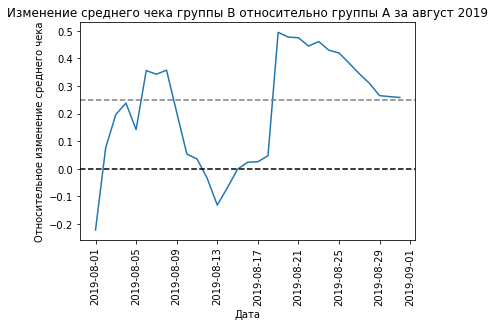

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
    /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.25, color='gray', linestyle='--');
plt.xticks(rotation='vertical');
plt.title('Изменение среднего чека группы В относительно группы А за август 2019');
plt.xlabel('Дата');
plt.ylabel('Относительное изменение среднего чека');

В нескольких точках график различия между сегментами резко «скачет», что тоже свидетельствует о наличии выбросов в данных. После резкого роста 17 августа, относительный прирост среднего чека снижается. К концу периода средний чек группы В примерно на 25% выше среднего чека группы А, но пока нельзя сказать, что значение зафиксировалось.

#### 2.2.2. Анализ куммулятивной конверсии

Конверсия - это отношение количества покупателей к количеству посетителей. То есть доля посетителей, которая совершила покупку.

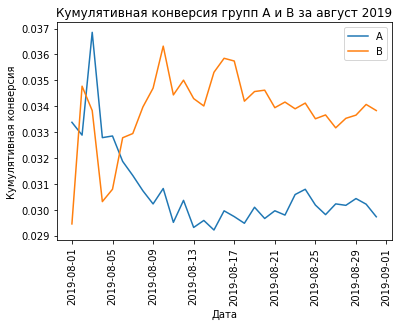

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation='vertical');
plt.legend();
plt.title('Кумулятивная конверсия групп А и В за август 2019');
plt.xlabel('Дата');
plt.ylabel('Кумулятивная конверсия');

Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд, а конверсия группы А просела. Нельзя сказать, что показатели зафиксировались - значения все еще "скачут" по дням. Но во второй половине месяца скачки становятся менее резкими.

Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

In [29]:
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

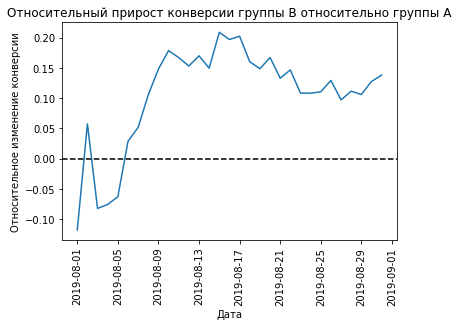

In [30]:
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation='vertical');
plt.title("Относительный прирост конверсии группы B относительно группы A");
plt.xlabel('Дата');
plt.ylabel('Относительное изменение конверсии');

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

#### 2.2.3. Поиск аномальных значений.
Выявить аномальные значения можно при помощи точечного графика. Построим график количества заказов каждого юзера.

In [31]:
#группируем заказы по посетителям
orders_by_visitor = orders.groupby('visitorId').agg({'transactionId': 'count'})

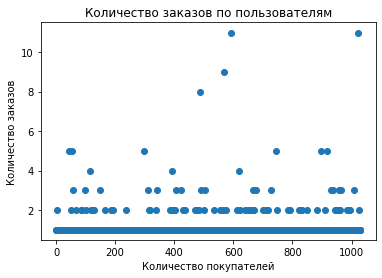

In [32]:
x_values = pd.Series(range(0,len(orders_by_visitor))) #ось х - это диапазон чисел от 0 до общего количества покупателей
plt.scatter(x_values, orders_by_visitor['transactionId']);
plt.title('Количество заказов по пользователям');
plt.xlabel('Количество покупателей');
plt.ylabel('Количество заказов');

В основном 1 заказ на пользователя, но и много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.
Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [33]:
np.percentile(orders_by_visitor['transactionId'], [95, 99])

array([2., 4.])

Не более 1% пользователей делали больше 4 заказов, не более 5% делали больше 2 заказов. Предлагаем считать два закааз границей для отсеивания аномалий.

Аналогично проанализируем стоимость заказов.

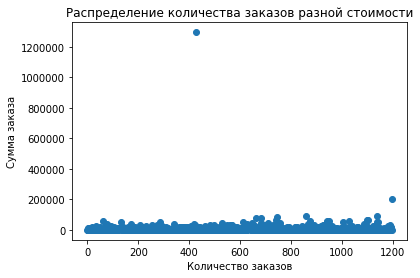

In [34]:
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue']);
plt.title('Распределение количества заказов разной стоимости');
plt.xlabel('Количество заказов');
plt.ylabel('Сумма заказа');

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов стоимостью от 28 000 и не более 1% стоимостью от 58 233.2 Выберем 28 000 верхней границей.

### 2.3. Статистическая проверка гипотез
#### 2.3.1. Исходные данные

Чтобы найти статистическую значимость различий в конверсии между группами, сформулируем гипотезы:
* Н0: между конверсией группы А и конверсией группы В нет статистически значимых различий;
* Н1: конверсия группы А и конверсия группы В различается, различие статистически значимо

Для проверки гипотезы здесь и далее используем уровень статистической значимости α = 0,05.

Подготовим выборки для сравнения. Выборка будет представлять собой список постетителей и число заказов у каждого. Если посетитель не делал покупок, то ему будет соответствновать 0.
Для каждой категории покупателей группируем заказы по visitorId и посчитаем количество заказов. Затем к полученному датафрейму методом pd.concat() добавим series, состоящий из нулей. Размер series определим как разность между количеством посетителей и покупателей.

In [36]:
#расчет количества заказов на пользователя
orders_per_user_A = orders[orders['group'] == 'A'].groupby('visitorId').agg({'transactionId': 'nunique'})
orders_per_user_B = orders[orders['group'] == 'B'].groupby('visitorId').agg({'transactionId': 'nunique'})

In [37]:
total_visitors_A = visitors[visitors['group'] == 'A']['visitors'].sum() #количество посетителей группы А
total_buyers_A = len(orders_per_user_A['transactionId']) #количество покупателей группы А
total_visitors_B = visitors[visitors['group'] == 'B']['visitors'].sum() #количество посетителей группы В
total_buyers_B = len(orders_per_user_B['transactionId']) #количество покупателей группы В

In [38]:
#создаем выборки
sample_A = pd.concat(
    [orders_per_user_A['transactionId'],
     pd.Series(0, index=np.arange(total_visitors_A - total_buyers_A), name='orders')],axis=0
)
sample_B = pd.concat(
    [orders_per_user_B['transactionId'],
     pd.Series(0, index=np.arange(total_visitors_B - total_buyers_B), name='orders')],axis=0
)



Так как в данных были выборсы, различия в конверсии полученных выборок проверим непараметрический тестом Уилкоксона-Манна-Уитни.

Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean(). 

Выведем на экран p-value и относительное изменение конверсии

In [39]:
print('Уровень значимости: 0.05')

print("P-value: {0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B, alternative='two-sided')[1]))

print("Относительное изменение конверсии: {0:.2%}".format(sample_B.mean() / sample_A.mean() - 1))

Уровень значимости: 0.05
P-value: 0.017
Относительное изменение конверсии: 13.81%


Конверсия в группе В оказалась на 13,81% больше, чем в группе А. Значение p-value 0,008 говорит о том, что с вероятностью 0,8% полученные различия в конверсии являются случайными. Это значение меньше, чем общеприятый уровень значимости 0,05. Следовательно, у нас есть основания отклонить нулевую гипотезу - скорее всего, конверсия в группе В действительно повысилась из-за эксперимента, а не случайно.

Проверим гипотезу о различии среднего чека:
* Н0: средний чек группы А и группы В не различается, либо различие статистически незначимо
* Н1: средний чек группы А и группы В различается (различие статистически значимо)

In [40]:
print('Уровень значимости: 0.05')
print((
    'P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                 orders[orders['group']=='B']['revenue'],
                                                 alternative='two-sided')[1]))
)

print((
    'Относительное изменение среднего чека: {0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()
                                                            /orders[orders['group']=='A']['revenue'].mean()-1))
)

Уровень значимости: 0.05
P-value: 0.729
Относительное изменение среднего чека: 25.87%


Средний чек группы В на 26% выше, чем в группе А. Но скорее всего данное различие получено случайно: p-value гораздо больше уровня значимости 0.05. Вероятность ошибочно отклонить нулевую гипотезу составляет 36,5%. Результат проверки не позволяет предполагать, что различие между средними чеками есть.


#### 2.3.2. Проверка гипотезы по фильтрованным данным.

Проверим, оказывают ли выбросы влияние на результаты проверки. Как мы выявили ранее, очень редко встречаются пользователи, которые сделали более 2 заказов. Стоимость заказа также редко превышает 28 000. Получим соответствущие срезы данных для каждой группы и объединим их в датафрейм abnormalUsers.

In [41]:
#список пользователей с количеством заказов больше 2
usersWithManyOrders = pd.concat(
    [
        orders_per_user_A[orders_per_user_A['transactionId'] > 2],
        orders_per_user_B[orders_per_user_B['transactionId'] > 2],
    ],
    axis=0,
).reset_index()

In [42]:
#список пользователей с дорогими заказами
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [43]:
#список "аномальных пользователей"
abnormalUsers = (
    pd.concat([usersWithManyOrders['visitorId'], usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

0     199603092
1     237748145
2     611059232
3    1230306981
4    1614305549
Name: visitorId, dtype: object
(74,)


В нашем эксперименте 74 пользователя совершали аномально много покупок или аномально дорогие покупки.
Теперь создадим выборки А и В по аналогии с "сырыми" данными - но возьмем только пользователей, которые не встречаются в датафрейме abnormalUsers. Это можно сделать при помощи метода .isin() с оператором ~.

In [44]:
sample_A_filtered = pd.concat(
    [orders_per_user_A[~orders_per_user_A.index.isin(abnormalUsers)]['transactionId'],
     pd.Series(0, index=np.arange(total_visitors_A - total_buyers_A), name='orders')],axis=0
)
sample_B_filtered = pd.concat(
    [orders_per_user_B[~orders_per_user_B.index.isin(abnormalUsers)]['transactionId'],
     pd.Series(0, index=np.arange(total_visitors_B - total_buyers_B), name='orders')],axis=0
)

print("P-value: {0:.3f}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))

print("Относительное изменение конверсии: {0:.2%}".format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

P-value: 0.007
Относительное изменение конверсии: 17.27%


Избавившись от выбросов, мы получили еще более выраженные и более значимые различия в конверсии. Конверсия в группе В стала больше на 17,27%, а вероятность ошибочно отвергнуть нулевую гипотезу уменьшилась и составила 0,7%.
Теперь проверим гипотезу о различии среднего чека по "очищенным" данным.

In [45]:
revenue_A = orders[(~orders['visitorId'].isin(abnormalUsers))&(orders['group']=='A')]['revenue']
revenue_B = orders[(~orders['visitorId'].isin(abnormalUsers))&(orders['group']=='B')]['revenue']

In [46]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')[1]))
print("Относительное изменение среднего чека: {0:.2%}".format(revenue_B.mean() / revenue_A.mean() - 1))

P-value: 0.738
Относительное изменение среднего чека: -1.96%


В данных без выбросов средниц чек группы В оказался не больше, а даже меньше, чем в группе В. Но данные различия все равно нельзя считать значимыми, т.к. p-value получился слишком большой, и мы не можем отвергнуть нулевую гипотезу о том, что средние чеки двух групп равны.

## 4. Выводы
* График различия среднего чека колеблется, что предпологает наличие аномалий в выборках. Сделать из этого графика определённые выводы нельзя.
* И по сырым, и по очищенным данным нет статистически значимого различия по среднему чеку между группами. 
* В группе В наблюдается более высока конверсия, чем в группе А. Данное различие статистически значимо. 
* После того, как мы отфильтровали аномальные значения, различие стало более ярко выраженным, а его статистическая значимость повысилась.
* Различие в конверсии, но не в среднем чеке говорит о том, что в группе В доля покупателей больше, чем в группе А, но сумма среднего заказа при этом не увеличилась.  
* График различия конверсии между группами показывает, что результаты группы B лучше группы A и имеют тенденцию к росту, в то время как результаты группы А снижаются. К концу периода результаты не зафикисировались, но скачки стали менее резкими, график начинает "сглаживаться". Поэтому мы предполагаем, что можно зафиксировать победу группы В и остановить тест.
